**<h1 align="center">Model Training and Evaluation</h1>**

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading the preprocessed data
df = pd.read_csv('movies_prepr_featureExt.csv',sep=r',', skipinitialspace=True)
df.head(5)

,title,genres,original_language,popularity,production_companies,release_year,runtime,vote_average,vote_count,pc_impact,pcif,gif,pop_actor,success_pot
0,Meg 2: The Trench,Action,en,4.5,warner bros,2023,3.037037,7.079,4.417647,1.688612,high,high,True,1
1,The Pope's Exorcist,Horror,en,4.5,screen gems,2023,2.074074,7.433,1.763823,0.644241,low,high,True,1
2,Transformers: Rise of the Beasts,Action,en,4.5,paramount,2023,3.851852,7.340,3.259026,1.516934,high,high,True,1
3,Ant-Man and the Wasp: Quantumania,Action,en,4.5,marvel,2023,3.703704,6.507,9.097441,5.512888,very high,high,True,1
4,Creed III,Drama,en,4.5,metro-goldwyn-mayer,2023,3.037037,7.262,3.653864,1.023453,medium,high,True,1


In [3]:
#Checking the distrubution of target feature
df['success_pot'].value_counts()

success_pot
0    6793
1    4397
Name: count, dtype: int64

<br/><br/>
**<h2>Encoding categorical features</h2>**

In [4]:
from sklearn.preprocessing import OneHotEncoder
felabel = ['genres','original_language']
oh = OneHotEncoder(handle_unknown='ignore')
f_encoded = oh.fit_transform(df[felabel])

# Converting the sparse matrix to a dense NumPy array
f_encoded_array = f_encoded.toarray()

# Creating a new DataFrame with the encoded features
df_encoded = pd.DataFrame(f_encoded_array, columns=oh.get_feature_names_out())
df_encoded = pd.concat([df, df_encoded], axis=1)

df = df_encoded.drop(['genres','original_language'], axis=1)
df.head(5)

,title,popularity,production_companies,release_year,runtime,vote_average,vote_count,pc_impact,pcif,gif,...,original_language_ta,original_language_te,original_language_th,original_language_tl,original_language_tr,original_language_uk,original_language_ur,original_language_vi,original_language_xx,original_language_zh
0,Meg 2: The Trench,4.5,warner bros,2023,3.037037,7.079,4.417647,1.688612,high,high,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Pope's Exorcist,4.5,screen gems,2023,2.074074,7.433,1.763823,0.644241,low,high,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Transformers: Rise of the Beasts,4.5,paramount,2023,3.851852,7.340,3.259026,1.516934,high,high,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ant-Man and the Wasp: Quantumania,4.5,marvel,2023,3.703704,6.507,9.097441,5.512888,very high,high,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Creed III,4.5,metro-goldwyn-mayer,2023,3.037037,7.262,3.653864,1.023453,medium,high,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.preprocessing import OrdinalEncoder

# Defining the ordinal encoding mappings
pcif_mapping = ['low', 'medium', 'high', 'very high']
gif_mapping = ['low', 'medium', 'high']
# Creating the OrdinalEncoder and fit-transform the data
ordinal_encoder = OrdinalEncoder(categories=[pcif_mapping, gif_mapping])
X_ordinal = ordinal_encoder.fit_transform(df[['pcif','gif']])

# Updating the original DataFrame with the encoded values
df['pcif'] = X_ordinal[:, 0]
df['gif'] = X_ordinal[:, 1]

In [6]:
from sklearn.preprocessing import LabelBinarizer

binary_encoder = LabelBinarizer()
df['pop_actor'] = binary_encoder.fit_transform(df['pop_actor'])

**<h2>Feature Selection</h2>**

<i>Before calculating feature selection parameters, we filter out certain features like 'title' and 'release year' which do not hold much significance as well as 'production_companies' which owing to its high cardinality which has been enconded, results in a bias in feature selection.<i>

<h3>1. Information Gain</h3>

In [7]:
#Calculating information Gain
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 'success_pot' is our target column
X = df.drop(['success_pot', 'title','production_companies','release_year'], axis=1)
y = df['success_pot']

Top 15 Features by Information Gain:
Feature: vote_count, Score: 0.150
Feature: popularity, Score: 0.128
Feature: vote_average, Score: 0.089
Feature: pc_impact, Score: 0.079
Feature: runtime, Score: 0.052
Feature: pcif, Score: 0.051
Feature: pop_actor, Score: 0.048
Feature: genres_Unknown, Score: 0.030
Feature: genres_Drama, Score: 0.019
Feature: original_language_en, Score: 0.018
Feature: original_language_pt, Score: 0.016
Feature: genres_Action, Score: 0.013
Feature: genres_Science Fiction, Score: 0.013
Feature: original_language_pa, Score: 0.012
Feature: genres_Western, Score: 0.011


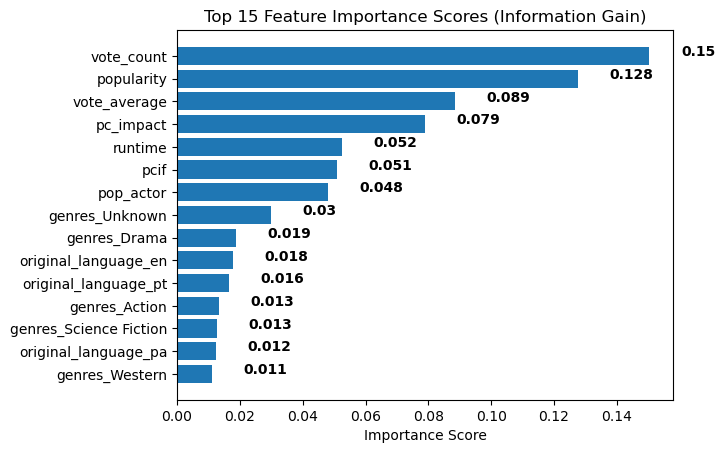

In [8]:
# Applying Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(X.shape[1]):
    feature_scores[X.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 15 feature importance scores and the sorted features
print("Top 15 Features by Information Gain:")
ftp = {}
for i, (feature, score) in enumerate(sorted_features):
    if i < 15 and score > 0.001:
        print(f"Feature: {feature}, Score: {score:.3f}")
        ftp[feature] = score

# Plot a horizontal bar chart of the top 15 feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(ftp))
ax.barh(y_pos, [score for feature, score in ftp.items()], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in ftp.items()])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Top 15 Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in ftp.items()]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

<h3>2. Chi-square test</h3>

Top 15 Features by Chi-Square Score:
Feature: 0, Score: 1402.897
Feature: 2, Score: 318.918
Feature: 20, Score: 191.138
Feature: 8, Score: 57.548
Feature: 42, Score: 47.375
Feature: 90, Score: 45.137
Feature: 46, Score: 41.460
Feature: 78, Score: 41.357
Feature: 41, Score: 34.220
Feature: 23, Score: 32.179
Feature: 9, Score: 31.811
Feature: 44, Score: 29.789
Feature: 80, Score: 28.261
Feature: 4, Score: 22.788
Feature: 13, Score: 22.464


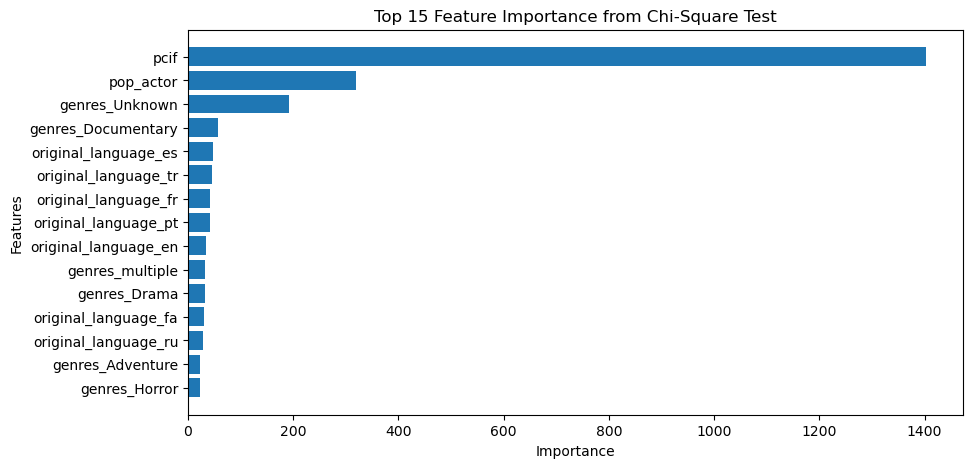

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

X1 = df.drop(['success_pot', 'title','vote_count','popularity','pc_impact','vote_average','runtime','release_year','production_companies'], axis=1)

# Applying Chi-Square Test
chi2_scores, p_values = chi2(X1, y)

# Create a DataFrame of feature importance scores
feature_scores = pd.DataFrame({'feature': X1.columns, 'score': chi2_scores})

# Sort the DataFrame by scores in descending order
feature_scores = feature_scores.sort_values('score', ascending=False)

# Print the top 15 features
print("Top 15 Features by Chi-Square Score:")
for i, (feature, score) in enumerate(feature_scores.iloc[:15].iterrows()):
    print(f"Feature: {feature}, Score: {score['score']:.3f}")

# Plot the top 15 scores
plt.figure(figsize=(10, 5))
plt.barh(feature_scores['feature'].iloc[:15], feature_scores['score'].iloc[:15])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importance from Chi-Square Test')
plt.gca().invert_yaxis()
plt.show()

<h3>3. Fisher's score</h3>

Top 15 Features by Fisher Score:
Feature: 0, Score: inf
Feature: 3, Score: inf
Feature: 4, Score: 251.716
Feature: 5, Score: 250.097
Feature: 7, Score: 161.019
Feature: 2, Score: 125.200
Feature: 1, Score: 123.883
Feature: 25, Score: 45.074
Feature: 46, Score: 31.217
Feature: 13, Score: 13.783
Feature: 47, Score: 11.533
Feature: 95, Score: 10.858
Feature: 51, Score: 10.182
Feature: 83, Score: 10.009
Feature: 14, Score: 9.705


/var/folders/v8/bn6qsbr91b76bhfphgzghhkm0000gn/T/ipykernel_49962/2445129473.py:9: RuntimeWarning: divide by zero encountered in log10
  fisher_scores = -np.log10(selector.pvalues_)


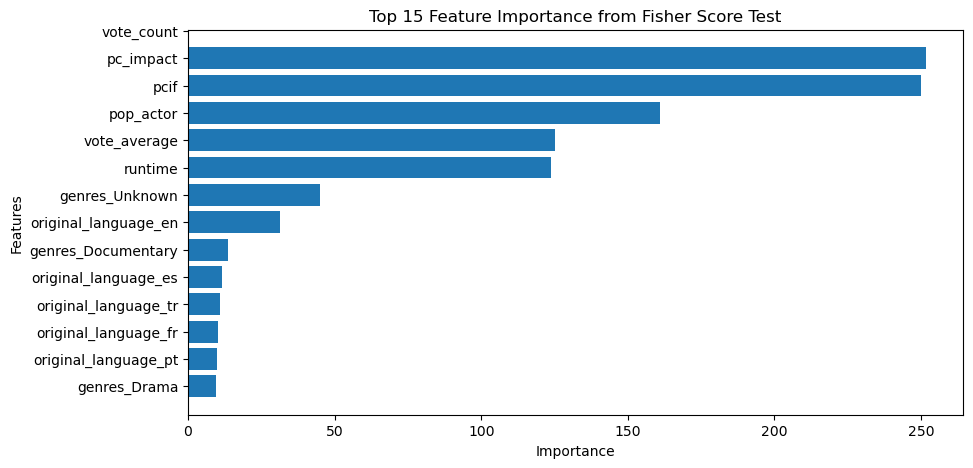

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Apply Fisher Score
selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

# Get the scores
fisher_scores = -np.log10(selector.pvalues_)

# Create a DataFrame of feature importance scores
feature_scores = pd.DataFrame({'feature': X.columns, 'score': fisher_scores})

# Sort the DataFrame by scores in descending order
feature_scores = feature_scores.sort_values('score', ascending=False)

# Print the top 15 features
print("Top 15 Features by Fisher Score:")
for i, (feature, score) in enumerate(feature_scores.iloc[:15].iterrows()):
    print(f"Feature: {feature}, Score: {score['score']:.3f}")

# Plot the top 15 scores
plt.figure(figsize=(10, 5))
plt.barh(feature_scores['feature'].iloc[:15], feature_scores['score'].iloc[:15])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importance from Fisher Score Test')
plt.gca().invert_yaxis()
plt.show()

<br/><br/>
**<h2>Random Forest</h2>**

In [11]:
import seaborn as sns

In [12]:
# Putting feature variable to X
X_m = df.drop(['success_pot', 'title','production_companies','release_year','popularity'], axis=1)
# Putting response variable to y
y_m = df['success_pot']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, train_size=0.85, random_state=42)

X_train.shape, X_test.shape

((9511, 100), (1679, 100))

In [14]:
#Balancing classes by oversampling using SMOTE
from imblearn.over_sampling import SMOTE
# Check the class distribution in the training set
print("Original training set class distribution:")
print(np.unique(y_train, return_counts=True))

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the class distribution in the resampled training set
print("Resampled training set class distribution:")
print(np.unique(y_train, return_counts=True))

Original training set class distribution:
(array([0, 1]), array([5781, 3730]))
Resampled training set class distribution:
(array([0, 1]), array([5781, 5781]))


In [15]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

#Applying recursive feature elimination
rfe = RFE(estimator=classifier_rf, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)


In [16]:
selected_features = X_train.columns[rfe.support_]
print('Selected features:', selected_features)

Selected features: Index(['runtime', 'vote_average', 'vote_count', 'pc_impact', 'pcif', 'gif',
       'pop_actor', 'genres_Action', 'genres_Comedy', 'genres_Drama',
       'genres_Horror', 'genres_Unknown', 'genres_multiple',
       'original_language_en', 'original_language_es', 'original_language_fr',
       'original_language_hi', 'original_language_ko', 'original_language_ml',
       'original_language_te'],
      dtype='object')


In [17]:
# Training the final model using the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_selected, y_train)


RandomForestClassifier(random_state=42)

F1-score: 0.77
Accuracy:  0.7689100655151876


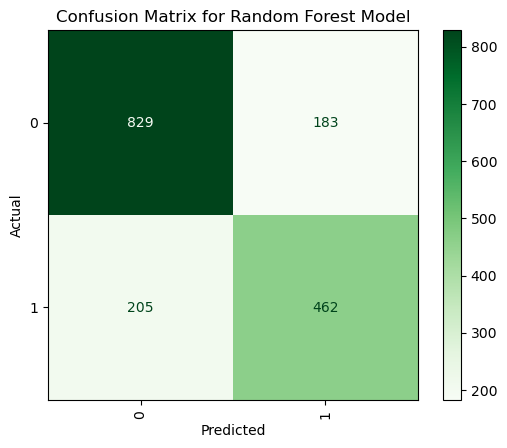

The false positive rate is:  0.1808300395256917


In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay,f1_score
#Evaluating the random forest model with recursive feature selection
y_pred  =  final_model.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
print("Accuracy: ", ac)
disp.plot(cmap='Greens', xticks_rotation='vertical')
disp.ax_.set_title('Confusion Matrix for Random Forest Model')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

FP = cm[0, 1]
TN = cm[0, 0]
FPR = FP / (FP + TN)
print('The false positive rate is: ', FPR)

In [19]:
#Hyperparameter Tuning using Grid Search

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [3,5,7,10],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [5,10,25,30,50]
}

from sklearn.model_selection import GridSearchCV

# Instantiating the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train_selected, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [5, 10, 25, 30, 50]},
             scoring='accuracy', verbose=1)

In [20]:
grid_search.best_score_

0.7629315235565812

In [21]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

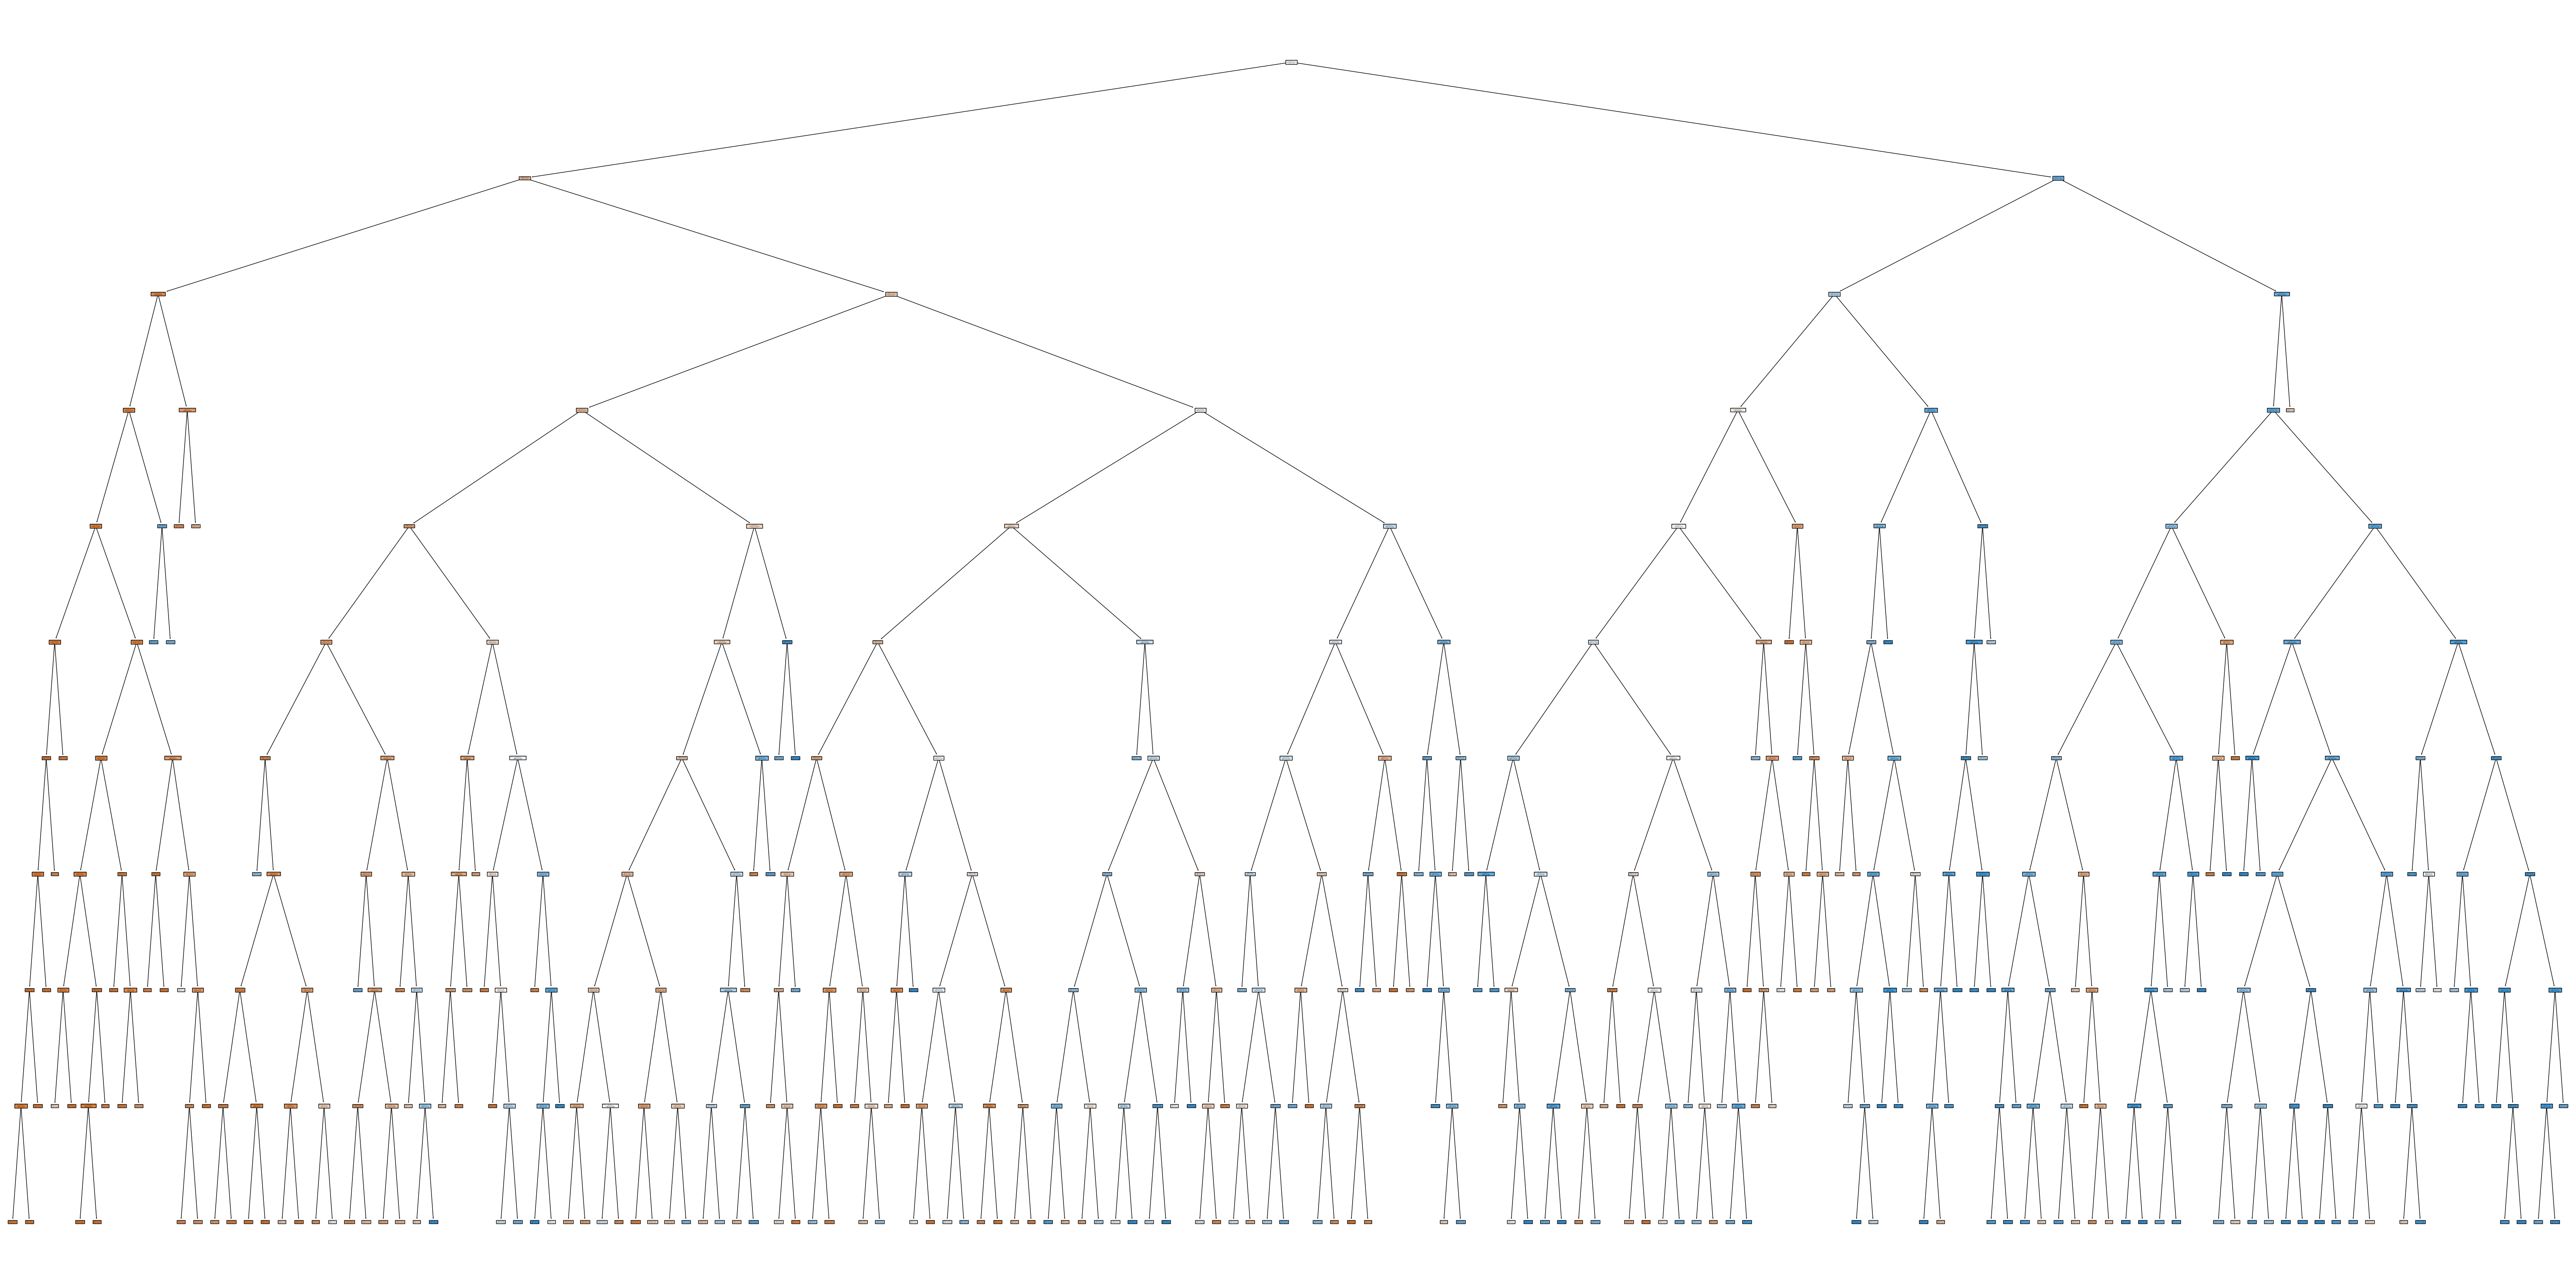

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = selected_features,class_names=["Flop","Success"],filled=True);

In [23]:
rf_best.feature_importances_

array([0.14461303, 0.14233413, 0.34897848, 0.18512483, 0.04278254,
       0.00786383, 0.03668873, 0.00525624, 0.00787519, 0.01120894,
       0.00805291, 0.00955197, 0.00379726, 0.01244699, 0.00183835,
       0.0093856 , 0.0062008 , 0.00582549, 0.00519404, 0.00498062])

In [24]:
print('Best Hyperparams: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Best Hyperparams:  {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 30}
Best Score:  0.7629315235565812


In [25]:
y_pred = grid_search.predict(X_test_selected)
acc = grid_search.score(X_test_selected, y_test)
acc

0.7534246575342466

F1-score: 0.75
Accuracy:  0.7534246575342466


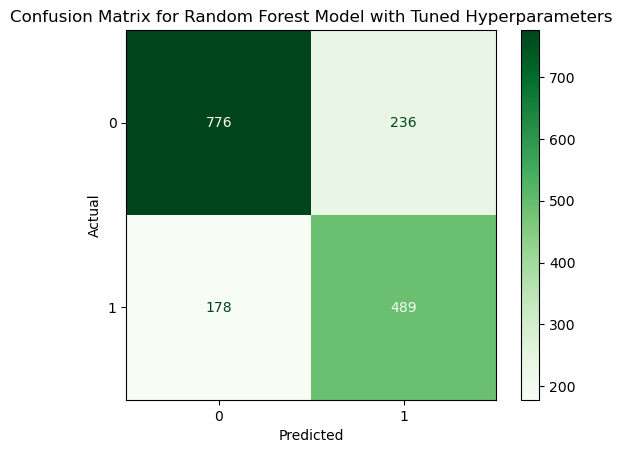

The false positive rate is:  0.233201581027668


In [26]:
best_model_RF = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model_RF.fit(X_train_selected,y_train)
#Evaluating the random forest model with recursive feature selection
y_pred  =  best_model_RF.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model_RF.classes_)
print("Accuracy: ", ac)
disp.plot(cmap='Greens', xticks_rotation='horizontal')
disp.ax_.set_title('Confusion Matrix for Random Forest Model with Tuned Hyperparameters')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

FP = cm[0, 1]
TN = cm[0, 0]
FPR = FP / (FP + TN)
print('The false positive rate is: ', FPR)

<h2>Decison Trees with Boosting</h2>

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score

In [28]:
model = xgb.XGBClassifier(objective='binary:logistic',
                         random_state=42)
rfe = RFE(estimator=model, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print('Selected features:', selected_features)
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)


Selected features: Index(['vote_average', 'vote_count', 'pc_impact', 'pcif', 'pop_actor',
       'genres_Adventure', 'genres_Comedy', 'genres_Drama', 'genres_Horror',
       'genres_Science Fiction', 'genres_Thriller', 'genres_Unknown',
       'original_language_af', 'original_language_en', 'original_language_fr',
       'original_language_hi', 'original_language_it', 'original_language_ko',
       'original_language_ru', 'original_language_te'],
      dtype='object')


In [29]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.5],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200, 300]})

F1-score: 0.76
Accuracy:  0.7564026206075045


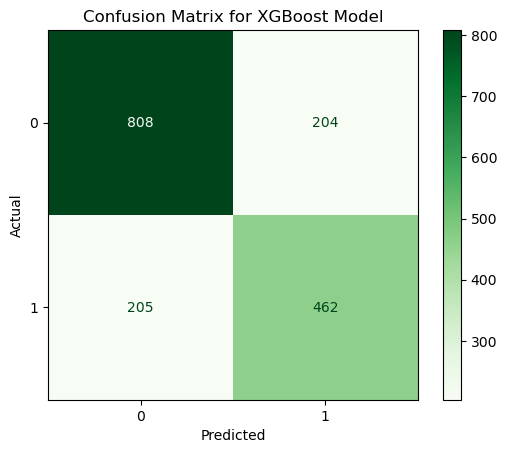

The false positive rate is:  0.2015810276679842


In [30]:
best_model_xgb = grid_search.best_estimator_
y_pred = best_model_xgb.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model_xgb.classes_)
print("Accuracy: ", accuracy)
disp.plot(cmap='Greens', xticks_rotation='horizontal')
disp.ax_.set_title('Confusion Matrix for XGBoost Model')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

FP = cm[0, 1]
TN = cm[0, 0]
FPR = FP / (FP + TN)
print('The false positive rate is: ', FPR)

<seperator />
<h2> Similarity Based: KNN</h2>

In [31]:
import sklearn

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski', p = 4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17, p=4)

In [33]:
y_pred = classifier.predict(X_test)
y_test, y_pred

(9979    0
 4333    1
 7910    0
 4395    0
 3016    0
        ..
 2020    0
 2036    1
 3413    0
 4972    1
 7765    0
 Name: success_pot, Length: 1679, dtype: int64,
 array([0, 1, 0, ..., 0, 1, 0]))

F1-score: 0.73
Accuracy:  0.7272185824895772


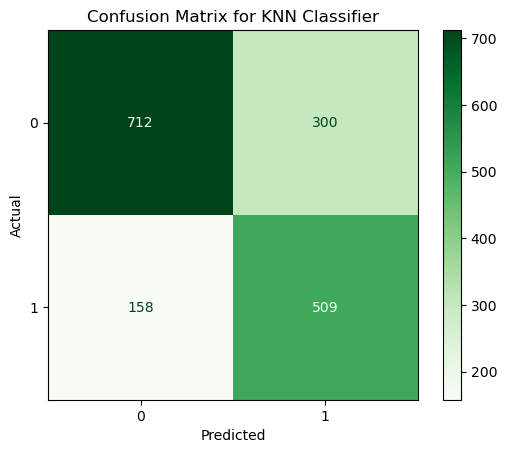

The false positive rate is:  0.2964426877470356


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
print("Accuracy: ", ac)
disp.plot(cmap='Greens', xticks_rotation='horizontal')
disp.ax_.set_title('Confusion Matrix for KNN Classifier')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

FP = cm[0, 1]
TN = cm[0, 0]
FPR = FP / (FP + TN)
print('The false positive rate is: ', FPR)

<h2>Probability based: Naive Bayes</h2>

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [36]:
selector = SelectKBest(chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.fit_transform(X_test, y_test)
classifier.fit(X_train_selected, y_train)

GaussianNB()

In [37]:
y_pred  =  classifier.predict(X_test_selected)
y_test,y_pred

(9979    0
 4333    1
 7910    0
 4395    0
 3016    0
        ..
 2020    0
 2036    1
 3413    0
 4972    1
 7765    0
 Name: success_pot, Length: 1679, dtype: int64,
 array([0, 1, 1, ..., 1, 1, 1]))

F1-score: 0.56
Accuracy:  0.7534246575342466


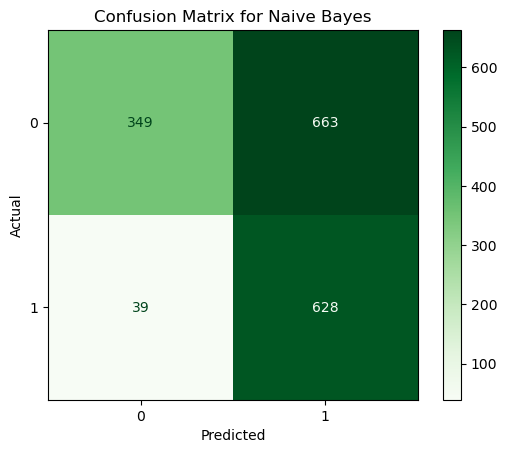

The false positive rate is:  0.6551383399209486


In [38]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
print("Accuracy: ", acc)
disp.plot(cmap='Greens', xticks_rotation='horizontal')
disp.ax_.set_title('Confusion Matrix for Naive Bayes')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

FP = cm[0, 1]
TN = cm[0, 0]
FPR = FP / (FP + TN)
print('The false positive rate is: ', FPR)

**<h2>Logistic Regression</h2>**

In [39]:
df_lg = pd.read_csv('movies_prepr_featureExt.csv',sep=r',', skipinitialspace=True)

In [40]:
df_lg = df_lg.drop(['title','genres','original_language','production_companies','release_year','popularity'], axis=1)
df_lg

,runtime,vote_average,vote_count,pc_impact,pcif,gif,pop_actor,success_pot
0,3.037037,7.079,4.417647,1.688612,high,high,True,1
1,2.074074,7.433,1.763823,0.644241,low,high,True,1
2,3.851852,7.340,3.259026,1.516934,high,high,True,1
3,3.703704,6.507,9.097441,5.512888,very high,high,True,1
4,3.037037,7.262,3.653864,1.023453,medium,high,True,1
...,...,...,...,...,...,...,...,...
11185,1.111111,3.350,0.000000,0.312982,low,medium,False,0
11186,0.000000,3.350,0.000000,0.312982,low,low,False,0
11187,1.111111,6.500,0.003236,0.312982,low,high,False,0
11188,1.111111,3.350,0.000000,0.312982,low,high,False,0


In [41]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(handle_unknown='ignore')

X_encoded = oh_encoder.fit_transform(df_lg.iloc[:, 4:7])

# Convert the sparse matrix to a dense NumPy array
X_encoded_array = X_encoded.toarray()

# Create a new DataFrame with the encoded features
df_lg_encoded = pd.DataFrame(X_encoded_array, columns=oh_encoder.get_feature_names_out())
# df_lg_encoded = pd.concat([df_lg, df_lg_encoded], axis=1)

df_lg_final = pd.concat([df_lg, df_lg_encoded], axis=1)
df_lg_final = df_lg_final.drop(df_lg.columns[4:7], axis=1)
df_lg_final.head(5)

,runtime,vote_average,vote_count,pc_impact,success_pot,pcif_high,pcif_low,pcif_medium,pcif_very high,gif_high,gif_low,gif_medium,pop_actor_False,pop_actor_True
0,3.037037,7.079,4.417647,1.688612,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.074074,7.433,1.763823,0.644241,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3.851852,7.340,3.259026,1.516934,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3.703704,6.507,9.097441,5.512888,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,3.037037,7.262,3.653864,1.023453,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [42]:

X_lg = df_lg_final.drop('success_pot', axis=1)
y_lg = df_lg_final['success_pot']

X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_lg, y_lg, train_size=0.85, random_state=42)
X_train_lg.shape, X_test_lg.shape

((9511, 13), (1679, 13))

In [43]:
#Balancing classes by oversampling using SMOTE
from imblearn.over_sampling import SMOTE
# Check the class distribution in the training set
print("Original training set class distribution:")
print(np.unique(y_train, return_counts=True))

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_lg, y_train_lg)

# Check the class distribution in the resampled training set
print("Resampled training set class distribution:")
print(np.unique(y_train_resampled, return_counts=True))


Original training set class distribution:
(array([0, 1]), array([5781, 5781]))
Resampled training set class distribution:
(array([0, 1]), array([5781, 5781]))


In [44]:
#Applying recursive feature eliminatiom
df_lg_finalVars=df_lg_final.columns.values.tolist()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe = rfe.fit(X_train_resampled, y_train_resampled.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False  True  True  True False False  True
  True]
[1 1 1 1 1 4 1 1 1 2 3 1 1]


In [45]:
y_train_resampled

0        0
1        1
2        0
3        0
4        1
        ..
11557    1
11558    1
11559    1
11560    1
11561    1
Name: success_pot, Length: 11562, dtype: int64

In [46]:
cols = ['runtime','vote_count','pc_impact','pcif_high','pcif_medium','pcif_very high','gif_high','pop_actor_False','pop_actor_True']
X=X_train_resampled[cols]
y=y_train_resampled


In [47]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.544204
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: success_pot      Pseudo R-squared: 0.215     
Date:               2024-04-20 01:52 AIC:              12602.1662
No. Observations:   11562            BIC:              12668.3655
Df Model:           8                Log-Likelihood:   -6292.1   
Df Residuals:       11553            LL-Null:          -8014.2   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
runtime           0.2008   0.0125  16.0382 0.0000  0.1762  0.2253
vote_count        0.3064   0.0087  35.1905 0.0000  0.2894  0.3235


In [48]:
cols = ['runtime','vote_count','pc_impact','pcif_medium','gif_high','pop_actor_False','pop_actor_True']
X=X_train_resampled[cols]
y=y_train_resampled
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.544775
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: success_pot      Pseudo R-squared: 0.214     
Date:               2024-04-20 01:52 AIC:              12611.3881
No. Observations:   11562            BIC:              12662.8765
Df Model:           6                Log-Likelihood:   -6298.7   
Df Residuals:       11555            LL-Null:          -8014.2   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
runtime           0.2012   0.0125  16.0862 0.0000  0.1767  0.2257
vote_count        0.3065   0.0087  35.2084 0.0000  0.2895  0.3236


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train_log, y_train_log)

LogisticRegression()

Accuracy:  0.7068741893644618
F1-score: 0.70


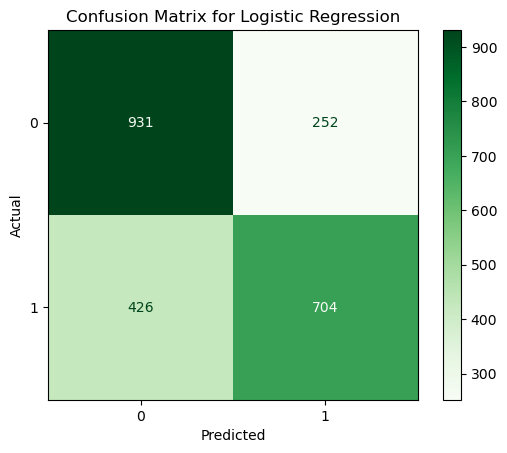

The false positive rate is:  0.21301775147928995


In [50]:
y_pred_log = logreg.predict(X_test_log)
cm = confusion_matrix(y_test_log, y_pred_log)
ac = accuracy_score(y_test_log,y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
print("Accuracy: ", ac)
f1 = f1_score(y_test_log, y_pred_log, average='weighted')
print(f'F1-score: {f1:.2f}')
disp.plot(cmap='Greens', xticks_rotation='horizontal')
disp.ax_.set_title('Confusion Matrix for Logistic Regression')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

FP = cm[0, 1]
TN = cm[0, 0]
FPR = FP / (FP + TN)
print('The false positive rate is: ', FPR)